In [6]:
import torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from dataloader import testing_dataset, training_dataset
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm
import seaborn
from vit_pytorch import ViT
from einops import rearrange
import torch.nn.functional as F

In [7]:
training_dataset.labels

,Tragedy,Action,Adventure,Mature,SchoolLife,Sci-fi,Adult,Drama,Supernatural,Comedy,...,Seinen,Wuxia,MartialArts,Historical,Mecha,ShounenAi,Ecchi,Sports,Yuri,Xuanhuan
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2037,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2038,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2039,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
pares = []
for elm in tqdm(os.listdir('./saves')):
    data = torch.load(f'./saves/{elm}')
    
    pares.append((data['epoch'], data['loss']))

100%|██████████| 100/100 [00:38<00:00,  2.62it/s]


In [3]:
pares = np.array(pares)

In [4]:
epoch = pares[::,0]
loss = pares[::,1]

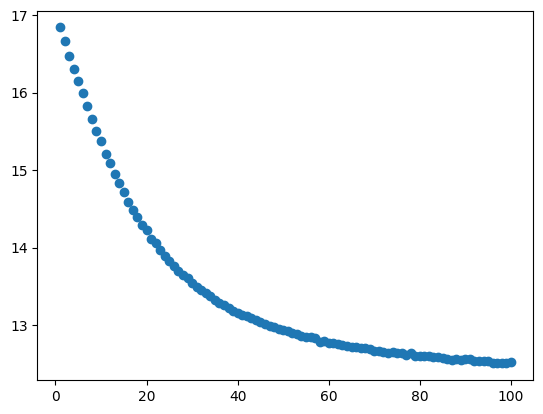

In [5]:
plt.scatter(epoch, loss)

In [2]:
vision_model = ViT(
    image_size=128 * 3,
    patch_size=32,
    num_classes=39,
    dim=512,
    depth=6,
    heads=16,
    mlp_dim=1024,
    dropout=0.1,
    emb_dropout=0.1
).to('cuda').eval()

In [3]:
data = DataLoader(testing_dataset, 32)

In [4]:
pares = []
for elm in tqdm(os.listdir('./saves')):
    model_data = torch.load(f'./saves/{elm}')
    
    vision_model.load_state_dict(model_data['model_state_dict'])
    vision_model = vision_model.eval()
    total_loss = 0
    
    with torch.no_grad():
        for batch in data:
            scores = vision_model(batch[0])

        total_loss += F.cross_entropy(scores, batch[1])
        del batch
                
    pares.append((model_data['epoch'], (total_loss / len(data)).cpu()))
    del model_data

100%|██████████| 100/100 [26:56<00:00, 16.16s/it]


In [6]:
pares = np.array(pares).transpose()

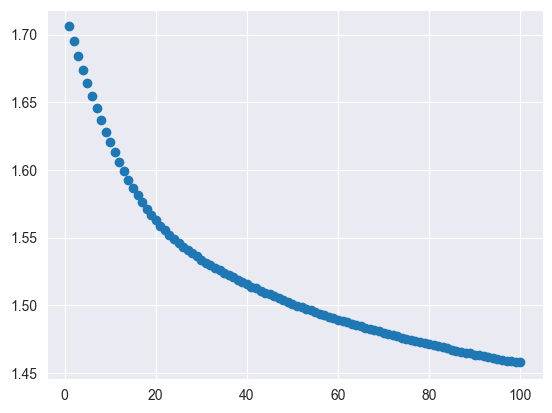

In [16]:
plt.scatter(pares[0], pares[1])